Body size and range size relationship of avian scavengers
=================

Proposal
-----------

* Explain the triangle-shaped distribution

### Background

### Objectives

### Significance

### Methods

We will study 65 species of 22 obligate and 43 facultative avian scavengers from around the world. eBird is a bird-watching database with a wealth of observation records that we will use to calculate the extent of occurrence (EOO) of each species.

We draw from the methods used by [Blackburn and Gaston (1986)](https://www.jstor.org/stable/56368) to evaluate the relationship between the body size and the range size of obligate and facultative avian scavenger species. First we examine them as a single entity and then compare the effect diet strategy may have on the body size-range size relationship.

-------------------------------
Preamble
--------

Import libraries, open the data, set global options.

In [1]:
import pandas as pd  # For manipulating data structures
import numpy as np  # For mathematical functions
import statsmodels.api as sm  # For statistical methods
import matplotlib.pyplot as plt  # Essentially the Python equivalent to ggplot2
import seaborn as sns  # A library for statistical graphics built on top of Matplotlib

Read the data, excluding the columns Cara and I used for bookkeeping. I will index by species names rather than by row numbers to make working with the data frame more intuitive.

In [2]:
columns = [
    "Species name",
    "Scientific name",
    "Diet",
    "Extent of occurrence",
    "BirdLife Extent of occurrence",
    "Body size",
]

scavengers = pd.read_csv(
    "../data/MacroEco scavenger data.csv", usecols=columns, index_col="Species name"
)
scavengers.head()

,Scientific name,Diet,Extent of occurrence,BirdLife Extent of occurrence,Body size
Species name,,,,,
Black vulture,Coragyps atratus,Obligate,42593865.0,44300000.0,2200
Turkey vulture,Cathartes aura,Obligate,52285085.0,47100000.0,2500
Lesser yellow headed vulture,Cathartes burrovianus,Obligate,19989926.0,19600000.0,950
Greater yellow headed vulture,Cathartes melambrotus,Obligate,7481821.0,7330000.0,1650
King vulture,Sarcoramphus papa,Obligate,17390218.0,22600000.0,3800


Find and display any rows that have `NaN` (Not a Number) values.

In [3]:
scavengers.loc[scavengers.isnull().any(axis=1)]

,Scientific name,Diet,Extent of occurrence,BirdLife Extent of occurrence,Body size
Species name,,,,,
Hooded crow,Corvus cornix,Facultative,21136393.72,NaN,650


BirdLife currently lists no data for the extent of occurrence (EOO) for the hooded crow, so let's drop it from our dataset.

In [4]:
scavengers.drop(["Hooded crow"], inplace=True)

Raw data exploration
-----------

Compare the raw data of the EOO from BirdLife and the EOO Cara and I calculated in ArcGIS with the convex hull method.

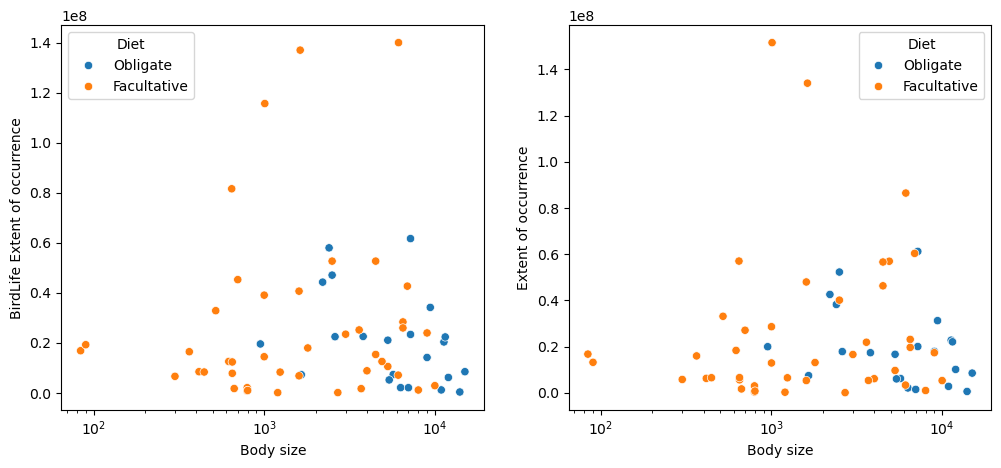

In [7]:
fig, (ax1, ax2) = plt.subplots(
    1,  # The number of rows in my plot.
    2,  # The number of columns in my plot.
    figsize=(12, 5),
    sharex=True,
)

sns.scatterplot(
    ax=ax1,
    x="Body size",
    y="BirdLife Extent of occurrence",
    hue="Diet",
    data=scavengers,
)
sns.scatterplot(
    ax=ax2,
    x="Body size",
    y="Extent of occurrence",
    hue="Diet",
    data=scavengers,
)
plt.xscale("log")  # Default log scale used by Seaborn is base 10, not natural log.
plt.show()

They don't look too terribly different so that's a good sign for how we calculated the EOO in ArcGIS, considering how BirdLife has access to more sources f data that we don't. With that newly instilled confidence, let's look at how the data is distributed.

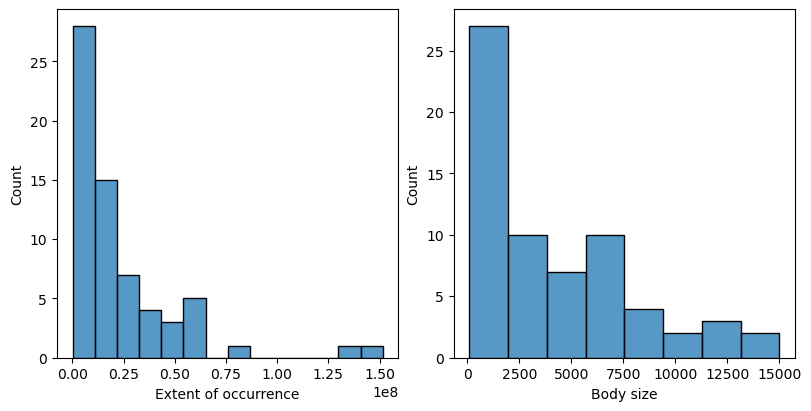

In [20]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (8,4), layout="constrained")

sns.histplot(ax=ax1, data=scavengers, x="Extent of occurrence",) #  log_scale=True

sns.histplot(ax=ax2, data=scavengers, x="Body size",) #  log_scale=True

plt.show()

-----------
## OLS - scavengers without dietary distinction

**Define the fixed and dependent variables.**

Blackburn and Gaston 1996 used ordinary least squares with a log transformation applied to the body sizes, which we have done here as well.

The `OLS` function in the Statsmodels library does not include the intercept term, $\beta_0$, by default, so we must do this ourselves. The way to do this is with the `add_constant` function to add a constant term to the linear equation, adding a column called "const". ([Statsmodels tools.add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html)). In effect, it is the difference between fitting $y = \beta_1x$ and $y = \beta_0 + \beta_1x$.

[.pyTutorial, 2025. Python Statsmodels add_constant() explained](https://pytutorial.com/python-statsmodels-add_constant-explained/).

<!-- The intercept term is the expected value of the dependent variable when the fixed variables are zero. -->
<!-- The way to do this is with the `add_constant` function to add a constant term, which is the intercept of the regression line. What `add_constant` does is it adds a column of ones to the dataset. -->

In [ ]:
y = scavengers["Extent of occurrence"]
x = np.log(scavengers["Body size"])  # N.B. Numpy uses the natural log by default.
x = sm.add_constant(x)

# If I want to compare with the fit using BirdLife's EOO:
# y_birdlife = scavengers["BirdLife Extent of occurrence"]

**Fit the OLS model using our EOO data.** 
<!-- A second model is available to view BirdLife EOO data's model fit. -->

`fit` uses the Moore-Penrose pseudoinverse method ([Statsmodels OLS.fit](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html)), a commonly used method to solve the least squares system of linear equations ([Wolfram Mathworld, Moore-Penrose Matrix Inverse](https://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html)).

In [20]:
ols_model = sm.OLS(y, x).fit()
# birdlife_ols_model = sm.OLS(y_birdlife, x).fit()  # For the BirdLife EOO data model.

print(ols_model.summary())

                             OLS Regression Results                             
Dep. Variable:     Extent of occurrence   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.016
Method:                   Least Squares   F-statistic:                  0.006141
Date:                  Mon, 24 Mar 2025   Prob (F-statistic):              0.938
Time:                          21:48:25   Log-Likelihood:                -1226.0
No. Observations:                    66   AIC:                             2456.
Df Residuals:                        64   BIC:                             2460.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.161e+07   2.28e+07

The `coef` column shows the OLS regression coefficients, from which we can determine our regression equation:

$y_i = \beta_0 + \beta_1x_i$

EOO $_i$ = 2.16 x $10^7$ + 2.28 x $10^5 \cdot$(Body size $_i$)

This is practically a flat line, shown below, indicating that there's basically no effect of body size on EOO across avian scavenger species and is corroborated by the $R^2$ value of 0.0. The p-value, 0.94, also suggests no relationship between body size and range size in avian scavengers.

The Jarque-Bera test result indicates that the data is not normally distributed (233.3, p < 0.05), so this might warrant further investigation whether an OLS is an appropriate test to use.

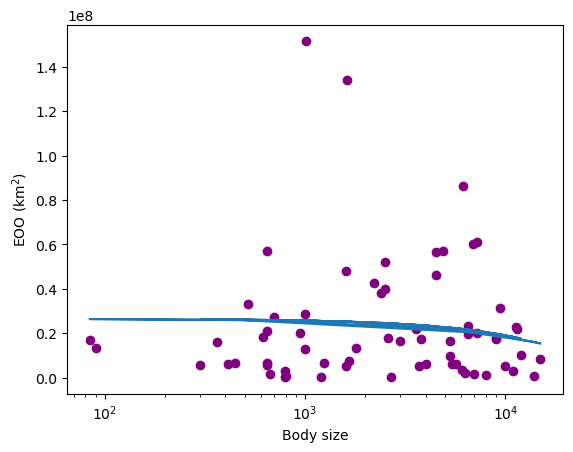

In [ ]:
a, b = np.polyfit(scavengers["Body size"], scavengers["Extent of occurrence"], 1)  # Fit a polynomial with least squares polynomial fit

plt.scatter(y=scavengers["Extent of occurrence"], x=scavengers["Body size"], color="purple")
plt.plot(scavengers["Body size"], a * scavengers["Body size"] + b)

plt.xlabel("Body size")
plt.ylabel("EOO (km$^2$)")
# plt.text(1, 90, "y = " + "{:.3f}".format(b) + " + {:.3f}".format(a) + "x", size=12)
# plt.xscale("log")

-------------
References
---------

BirdLife International (2025) IUCN Red List for birds. Last visited 2025-03-14. https://datazone.birdlife.org/